# Multiple Linear Regression

## Objectives



*   Use scikit-learn to implement multiple linear regression.
*   Testing the model on real data.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Exploratory data analysis

In [2]:
# Load the data

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.to_csv('data.csv')

In [5]:
df.sample()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
837,2014,NISSAN,ALTIMA,MID-SIZE,3.5,6,AV,X,10.8,7.4,9.3,30,214


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
# Drop categoricals and redundant columns

df = df.drop(['MODELYEAR', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE', 'MAKE'], axis =1 )

In [8]:
# Identify the dependent features

df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [9]:
# Drop the columns that are corelated to each other and have less impact on target variable

df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB' ], axis =1)

In [10]:
df.head(10)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267
9,2.4,31,212


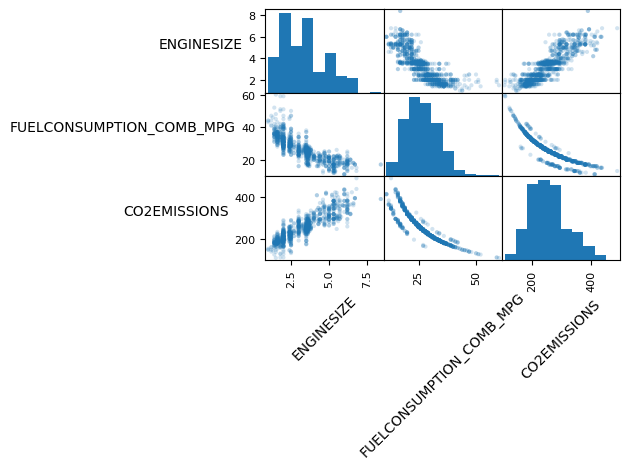

In [11]:
# Plot the scatter matrix to identify redundant features

axes = pd.plotting.scatter_matrix(df, alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


* The relationships between the features are identified.

In [12]:
# Extract input features and labels from data

X = df.iloc[:, [0,1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

In [13]:
# Preprocess selected features

from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)           # Deter this step as such operations lead to data leakage.

In [14]:
# View the processed data

pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


* It can be seen that the standarised variable has mean and std as zero.

## Model Building


In [15]:
# Create test train datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

In [16]:
# Build a Linear Regression model

from sklearn import linear_model

# Create model object
regressor = linear_model.LinearRegression()

# Train the model with the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print('Coefficients : ', coef_)
print('Intercept : ', intercept_)

Coefficients :  [[ 25.27339614 -37.4381472 ]]
Intercept :  [256.29072488]


In [17]:
# Get the standard scaler's mean and std parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# Original features
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print(' Coefficeints :', coef_original)
print(' Intercept : ', intercept_original)

 Coefficeints : [[17.8581369  -5.01502179]]
 Intercept :  [329.1363967]


## Visualising the model

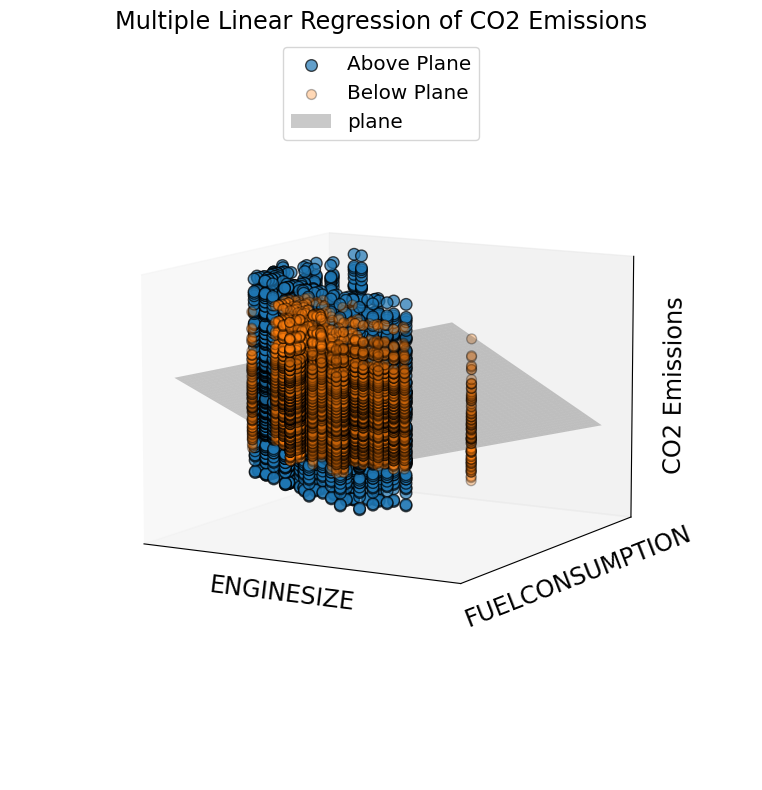

In [27]:
# Ensuring variables have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.savefig('Multiple Linear Regression of CO2 Emissions.png', dpi=300, bbox_inches='tight')
plt.show()


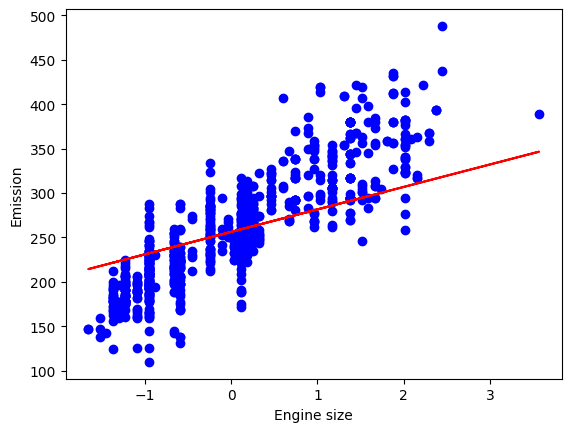

In [19]:
# Sliced off plots

plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

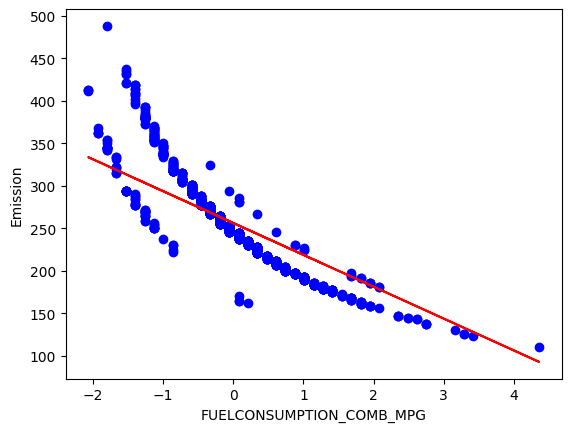

In [20]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

In [21]:
# Parameters for the best fit line with CO2 emissions vs engine size

# Load the data
X_train_1 = X_train[:,0]

# Build the model
regressor_1 = linear_model.LinearRegression()

# Train the model
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)

# Printing the coefficients
coef_1 =  regressor_1.coef_
intercept_1 = regressor_1.intercept_
print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


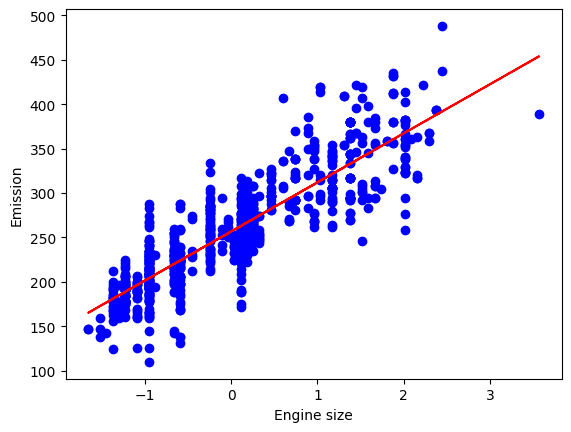

In [26]:
# Scatter plot of CO2 emissions vs engine size with best fit regression line to training data

plt.scatter(X_train_1, y_train,  color='blue')
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig('emissions_vs_engine size.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'CO2 Emission')

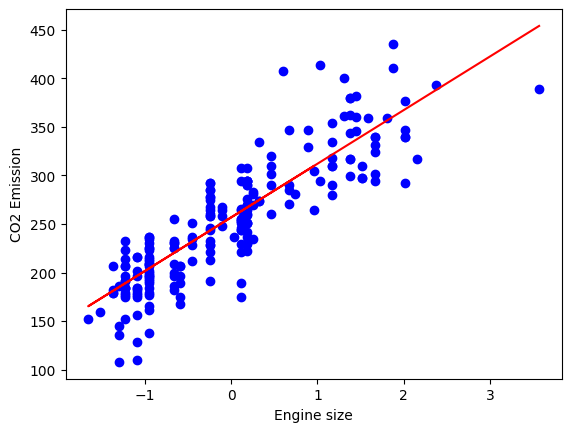

In [23]:
# Similar scatter plot with test data set

X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")


In [24]:
# Parameters for the best fit line with CO2 emissions vs fuel consumption

# Load the data
X_train_2 = X_train[:,1]

# Build the model
regressor_2 = linear_model.LinearRegression()

# Train the model
regressor_2.fit(X_train_2.reshape(-1, 1), y_train)

# Printing the coefficients
coef_2 =  regressor_2.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


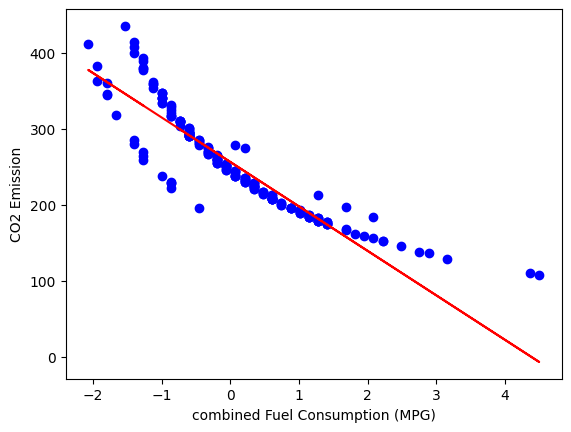

In [25]:
# Scatter plot of CO2 emissions vs fuel consumption with best fit regression line to training data

X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test,  color='blue')
plt.plot(X_test_2, coef_2[0] * X_test_2 + intercept_2, '-r')
plt.xlabel("combined Fuel Consumption (MPG)")
plt.ylabel("CO2 Emission")
plt.savefig('emissions_vs_fuel.png', dpi=300, bbox_inches='tight')